In [1]:
import keras
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img

In [2]:
train_data = ImageDataGenerator(rescale=1/255, shear_range=0.2, zoom_range=0.2, horizontal_flip=0.2, rotation_range=30)

In [3]:
train_set = train_data.flow_from_directory("../input/leafdata/val",target_size=(100,100),batch_size=16)

Found 1000 images belonging to 10 classes.


In [4]:
train_set.class_indices

{'Bacterial_spot': 0,
 'Early_blight': 1,
 'Late_blight': 2,
 'Leaf_Mold': 3,
 'Septoria_leaf_spot': 4,
 'Spider_mites Two-spotted_spider_mite': 5,
 'Target_Spot': 6,
 'Tomato_Yellow_Leaf_Curl_Virus': 7,
 'Tomato_mosaic_virus': 8,
 'healthy': 9}

In [5]:
from tensorflow.keras import Sequential
from keras.layers import Dense,Flatten, MaxPooling2D, Conv2D,Dropout
from keras.callbacks import EarlyStopping

In [6]:
model = Sequential ()
 
model.add(Conv2D(64,3,3,padding='same',input_shape=(100,100,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))
 
model.add(Conv2D (128,3,3,padding='same',activation='relu'))
model.add(MaxPooling2D (2,2))
model.add(Dropout(0.2))
 
model.add(Flatten ())
 
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [7]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
early = EarlyStopping(monitor='accuracy', patience=50)

In [9]:
model.fit(train_set,batch_size=32,epochs=60,steps_per_epoch=50,callbacks=[early])

Epoch 1/60
50/50 [==============================] - 6s 127ms/step - loss: 2.3003 - accuracy: 0.1200
Epoch 2/60
50/50 [==============================] - 4s 87ms/step - loss: 2.1391 - accuracy: 0.2096
Epoch 3/60
50/50 [==============================] - 4s 80ms/step - loss: 1.9321 - accuracy: 0.3030
Epoch 4/60
50/50 [==============================] - 4s 78ms/step - loss: 1.7575 - accuracy: 0.3638
Epoch 5/60
50/50 [==============================] - 4s 79ms/step - loss: 1.6388 - accuracy: 0.4356
Epoch 6/60
50/50 [==============================] - 4s 77ms/step - loss: 1.4852 - accuracy: 0.4975
Epoch 7/60
50/50 [==============================] - 4s 77ms/step - loss: 1.3112 - accuracy: 0.5682
Epoch 8/60
50/50 [==============================] - 4s 76ms/step - loss: 1.1102 - accuracy: 0.6275
Epoch 9/60
50/50 [==============================] - 4s 75ms/step - loss: 0.9965 - accuracy: 0.6553
Epoch 10/60
50/50 [==============================] - 4s 77ms/step - loss: 0.9691 - accuracy: 0.6641
Epoch 11

In [10]:
def result (path):
    img = load_img(path,target_size=(100,100,3))
    img = img_to_array(img)
    img = img/255
    img = np.expand_dims(img,axis=0)
    y = model.predict_classes(img)
    return y

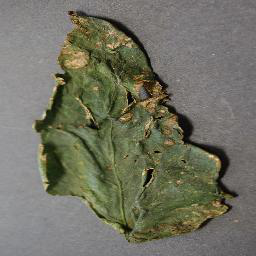

In [11]:
load_img("../input/testdata/test/1 (5).JPG")

In [12]:
result ("../input/testdata/test/1 (100).JPG")

array([8])

In [13]:
train_set.class_indices

{'Bacterial_spot': 0,
 'Early_blight': 1,
 'Late_blight': 2,
 'Leaf_Mold': 3,
 'Septoria_leaf_spot': 4,
 'Spider_mites Two-spotted_spider_mite': 5,
 'Target_Spot': 6,
 'Tomato_Yellow_Leaf_Curl_Virus': 7,
 'Tomato_mosaic_virus': 8,
 'healthy': 9}